In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')
np.random.seed(0) 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project/Data/Final_Annotated.csv')
len(data)

1007071

In [5]:
data.head()

,OG_Text,Bully,Clean_Text,Preprocessed_Text,Sentiment
0,`- This is not ``creative``. Those are the di...,None,`- This is not ``creative``. Those are the dic...,creativ dictionari definit term insur ensur pr...,NaN
1,` :: the term ``standard model`` is itself le...,None,` :: the term ``standard model`` is itself les...,term standard model npov think prefer new-ag s...,NaN
2,"True or false, the situation as of March 200...",None,"True or false, the situation as of March was s...",true fals situat march saudi propos land peac ...,NaN
3,"Next, maybe you could work on being less cond...",None,"Next, maybe you could work on being less conde...",mayb work condescend suggest read name convent...,NaN
4,This page will need disambiguation.,None,This page will need disambiguation.,page need disambigu,NaN


In [6]:
data.columns

Index(['OG_Text', 'Bully', 'Clean_Text', 'Preprocessed_Text', 'Sentiment'], dtype='object')

In [7]:
convert_dict = {'OG_Text': str,
                'Clean_Text': str,
                'Preprocessed_Text': str
                }
data = data.astype(convert_dict)

In [8]:
data.Sentiment.isna().sum()

331768

In [9]:
data.Bully.value_counts()

None          770500
Negative      183003
Toxic          19514
Aggression     13742
Sexism         12308
Misconduct      4010
Racism          3994
Name: Bully, dtype: int64

## **EDA**

In [10]:
test = data[data['Bully'].isna()]
train = data[data['Bully'].isna() == False]

In [11]:
train.Bully.value_counts()

None          770500
Negative      183003
Toxic          19514
Aggression     13742
Sexism         12308
Misconduct      4010
Racism          3994
Name: Bully, dtype: int64

In [12]:
category = train['Bully'].value_counts().reset_index()
category

,index,Bully
0,None,770500
1,Negative,183003
2,Toxic,19514
3,Aggression,13742
4,Sexism,12308
5,Misconduct,4010
6,Racism,3994


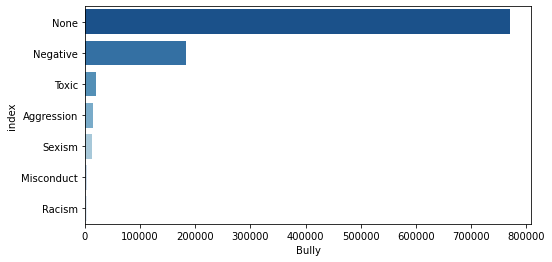

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x=category['Bully'], y=category['index'], palette='Blues_r')
plt.show()

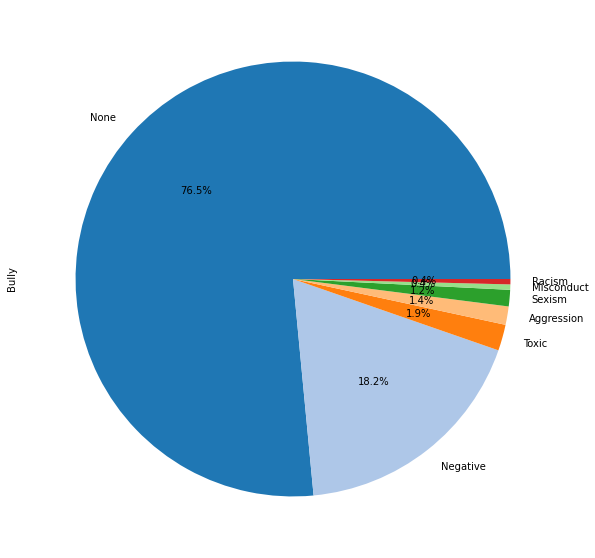

In [14]:
train['Bully'].value_counts().plot.pie(figsize = (20,10), colors=sns.color_palette('tab20'), autopct ='%1.1f%%')

## **Import NLTK**

In [15]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## **Word Clouds**

In [16]:
# Creates dictionary of category with all skills in that category
all_words = {}
for i in train.Bully.unique():
  list_col = list( train.Clean_Text[train['Bully'] == i] ) 
  all_words[str(i)] = [set(list_col)]

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
'''Plots wordcloud for any list of data'''

def Word_Cloud(df, cloud_title):
    comment_words = ""
    stopwords = set(STOPWORDS)
    for val in df:
        comment_words += " ".join(val)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (4,4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cloud_title)
    plt.show()

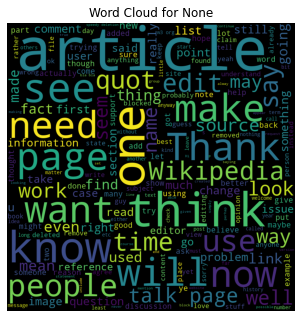

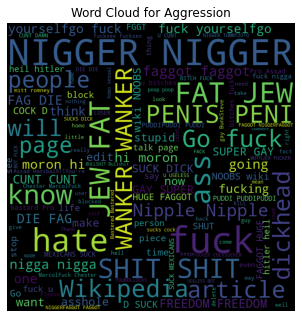

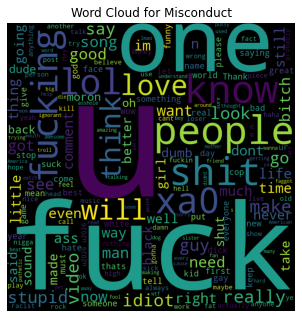

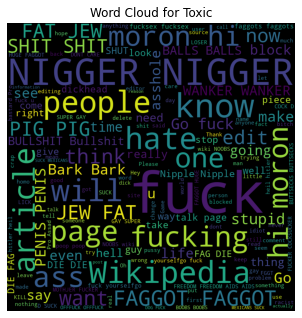

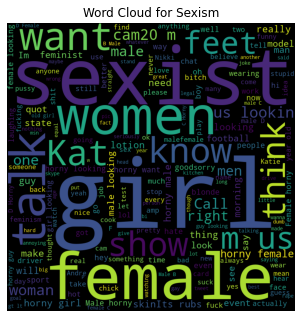

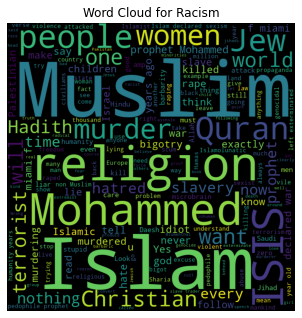

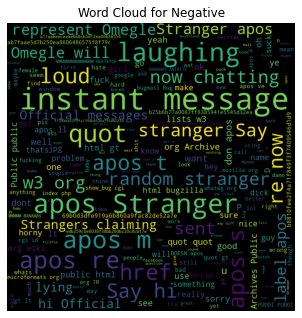

In [19]:
for v,k in all_words.items():
  Word_Cloud(k, f"Word Cloud for {v}")

## **Subsetting the Data**

In [20]:
subsets = {}
for i in train.Bully.unique():
  subsets[str(i)] = train[train['Bully']==i][:10000]

new_train = pd.DataFrame()
for i in subsets:
  new_train = pd.concat([new_train, subsets[i]], ignore_index=True)

new_train.head()

,OG_Text,Bully,Clean_Text,Preprocessed_Text,Sentiment
0,`- This is not ``creative``. Those are the di...,None,`- This is not ``creative``. Those are the dic...,creativ dictionari definit term insur ensur pr...,NaN
1,` :: the term ``standard model`` is itself le...,None,` :: the term ``standard model`` is itself les...,term standard model npov think prefer new-ag s...,NaN
2,"True or false, the situation as of March 200...",None,"True or false, the situation as of March was s...",true fals situat march saudi propos land peac ...,NaN
3,"Next, maybe you could work on being less cond...",None,"Next, maybe you could work on being less conde...",mayb work condescend suggest read name convent...,NaN
4,This page will need disambiguation.,None,This page will need disambiguation.,page need disambigu,NaN


In [21]:
new_train.Bully.value_counts()

None          10000
Aggression    10000
Toxic         10000
Sexism        10000
Negative      10000
Misconduct     4010
Racism         3994
Name: Bully, dtype: int64

## **Splitting Data**

In [22]:
Y_sub = new_train.Bully
X_sub = new_train.drop(['Bully'], axis = 1)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [24]:
X_train_sub, X_val_sub, Y_train_sub, Y_val_sub = train_test_split(X_sub, Y_sub, test_size=0.3, random_state=42, stratify = new_train['Bully'])
print(X_train_sub.shape, X_val_sub.shape, Y_train_sub.shape, Y_val_sub.shape)

(40602, 4) (17402, 4) (40602,) (17402,)


## **Count Vectorizer**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=10)
vector_train = cv.fit_transform(X_train_sub.Preprocessed_Text)
vector_val = cv.transform(X_val_sub.Preprocessed_Text)
print(type(vector_train))
X_train_tfidf = vector_train.toarray()
X_val_tfidf = vector_val.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
import pickle
filename = '/content/drive/MyDrive/Capstone Project/Models/CountVectorizer.sav'
pickle.dump(cv, open(filename, 'wb'))

# **SKLEARN CLASSIFICATION**

## **Pickling Sklearn Model**

In [ ]:
def save_model(model, name):
  filename = '/content/drive/MyDrive/Capstone Project/Models/' + str(name) + '.sav'
  pickle.dump(model, open(filename, 'wb'))

def load_model(name):
  filename = '/content/drive/MyDrive/Capstone Project/Models/' + str(name) + '.sav'
  return pickle.load(open(filename, 'rb'))

## **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train_tfidf,Y_train_sub)
pred_naive = naive.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_naive)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_naive)}')

Accuracy : 0.5658482142857143


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.28      0.24      0.26      3000
  Misconduct       0.37      0.51      0.43       920
    Negative       0.73      0.63      0.68      3000
        None       0.64      0.83      0.72      3000
      Racism       0.82      0.90      0.86      1182
      Sexism       0.80      0.75      0.78      2026
       Toxic       0.37      0.33      0.35      3000

    accuracy                           0.57     16128
   macro avg       0.57      0.60      0.58     16128
weighted avg       0.56      0.57      0.56     16128



In [ ]:
save_model(naive, 'naive')

In [ ]:
naive = load_model('naive')

## **K - Nearest Neighbour** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf,Y_train_sub)
pred_knn = knn.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_knn)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_knn)}')

Accuracy : 0.39130704365079366


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.27      0.23      0.25      3000
  Misconduct       0.35      0.19      0.24       920
    Negative       0.34      0.95      0.50      3000
        None       0.63      0.35      0.45      3000
      Racism       0.83      0.35      0.49      1182
      Sexism       0.62      0.47      0.54      2026
       Toxic       0.21      0.07      0.11      3000

    accuracy                           0.39     16128
   macro avg       0.47      0.37      0.37     16128
weighted avg       0.43      0.39      0.36     16128



In [ ]:
save_model(knn, 'knn')

In [ ]:
knn = load_model('knn')

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf,Y_train_sub)
pred_log = log_reg.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_log)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_log)}')

Accuracy : 0.5811631944444444


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.37      0.32      0.34      3000
  Misconduct       0.65      0.33      0.44       920
    Negative       0.60      0.91      0.72      3000
        None       0.70      0.76      0.72      3000
      Racism       0.88      0.77      0.82      1182
      Sexism       0.75      0.67      0.71      2026
       Toxic       0.36      0.28      0.32      3000

    accuracy                           0.58     16128
   macro avg       0.61      0.58      0.58     16128
weighted avg       0.57      0.58      0.57     16128



In [ ]:
save_model(log_reg, 'log_reg')

In [ ]:
log_reg = load_model('log_reg')

## **Linear Support Vector Machine**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, tol=None)
sgd.fit(X_train_tfidf,Y_train_sub)
pred_sgd = sgd.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_sgd)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_sgd)}')

Accuracy : 0.5848214285714286


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.38      0.37      0.38      3000
  Misconduct       0.45      0.41      0.43       920
    Negative       0.58      0.96      0.72      3000
        None       0.72      0.73      0.72      3000
      Racism       0.86      0.87      0.87      1182
      Sexism       0.83      0.66      0.73      2026
       Toxic       0.33      0.17      0.23      3000

    accuracy                           0.58     16128
   macro avg       0.59      0.60      0.58     16128
weighted avg       0.57      0.58      0.56     16128



In [ ]:
save_model(sgd, 'sgd')

In [ ]:
sgd = load_model('sgd')

## **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_tfidf,Y_train_sub)
pred_svm = svm.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_svm)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_svm)}')

In [ ]:
save_model(svm, 'svm')

In [ ]:
svm = load_model('svm')

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf,Y_train_sub)
pred_dtc = dtc.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_dtc)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_dtc)}')

Accuracy : 0.5231274801587301


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.20      0.23      0.21      3000
  Misconduct       0.57      0.35      0.44       920
    Negative       0.66      0.90      0.76      3000
        None       0.67      0.57      0.62      3000
      Racism       0.92      0.91      0.91      1182
      Sexism       0.82      0.85      0.83      2026
       Toxic       0.09      0.07      0.08      3000

    accuracy                           0.52     16128
   macro avg       0.56      0.56      0.55     16128
weighted avg       0.50      0.52      0.51     16128



In [ ]:
save_model(dtc, 'dtc')

In [ ]:
load_model('dtc')

DecisionTreeClassifier()

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf,Y_train_sub)
pred_rfc = rfc.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_rfc)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_rfc)}')

In [ ]:
save_model(rfc, 'rfc')

In [ ]:
rfc = load_model('rfc')

## **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(X_train_tfidf,Y_train_sub)
pred_gbc = gbc.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_gbc)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_gbc)}')

In [ ]:
save_model(gbc, 'gbc')

In [ ]:
load_model('gbc')

## **Rocchio classification**

In [ ]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train_tfidf, Y_train_sub)
pred_clf = clf.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_clf)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_clf)}')

Accuracy : 0.42007688492063494


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.46      0.07      0.12      3000
  Misconduct       0.23      0.28      0.25       920
    Negative       0.32      0.99      0.48      3000
        None       0.58      0.46      0.51      3000
      Racism       0.86      0.63      0.73      1182
      Sexism       0.73      0.44      0.55      2026
       Toxic       0.45      0.11      0.18      3000

    accuracy                           0.42     16128
   macro avg       0.52      0.43      0.40     16128
weighted avg       0.50      0.42      0.38     16128



In [ ]:
save_model(clf, 'clf')

In [ ]:
clf = load_model('clf')

## **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
bag = BaggingClassifier(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, tol=None))
bag.fit(X_train_tfidf, Y_train_sub)
pred_bag = bag.predict(X_val_tfidf)

print(f'Accuracy : {accuracy_score(Y_val_sub, pred_bag)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_sub, pred_bag)}')

Accuracy : 0.5928819444444444


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.39      0.36      0.37      3000
  Misconduct       0.61      0.37      0.46       920
    Negative       0.58      0.95      0.72      3000
        None       0.71      0.74      0.73      3000
      Racism       0.87      0.86      0.87      1182
      Sexism       0.83      0.68      0.75      2026
       Toxic       0.35      0.22      0.27      3000

    accuracy                           0.59     16128
   macro avg       0.62      0.60      0.59     16128
weighted avg       0.58      0.59      0.57     16128



In [ ]:
save_model(bag, 'bag')

In [ ]:
bag = load_model('bag')

## **Comparison**

In [ ]:
accuracy = [[accuracy_score(Y_val_sub, pred_naive), f1_score(Y_val_sub, pred_naive, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_val_sub, pred_knn), f1_score(Y_val_sub, pred_knn, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_val_sub, pred_log), f1_score(Y_val_sub, pred_log, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_val_sub, pred_svm), f1_score(Y_val_sub, pred_svm, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_val_sub, pred_dtc), f1_score(Y_val_sub, pred_dtc, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_val_sub, pred_rfc), f1_score(Y_val_sub, pred_rfc, pos_label="pos", average='weighted')],
            [accuracy_score(Y_val_sub, pred_gbc), f1_score(Y_val_sub, pred_gbc, pos_label="pos", average='weighted')],
            [accuracy_score(Y_val_sub, pred_clf), f1_score(Y_val_sub, pred_clf, pos_label="pos", average='weighted')],
            [accuracy_score(Y_val_sub, pred_bag), f1_score(Y_val_sub, pred_bag, pos_label="pos", average='weighted')]]

pd.DataFrame(accuracy, columns = ['Prediction Accuracy', 'F1 Score'],
             index = ['Naive Bayes', 'K-Nearest Neighbour', 'Logistic Regression', 'Linear SVM', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Rocchio Classifier', 'Bagging Classifier'])

# **ANN**

In [70]:
from keras.layers import  Dropout, Dense
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [71]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 5 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [72]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
earlystopping = EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=15
                             )
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Capstone Project/Models/dnn.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_train_le = le.fit_transform(Y_train_sub)
Y_val_le = le.transform(Y_val_sub)

In [ ]:
filename = '/content/drive/MyDrive/Capstone Project/Models/LabelEnc.sav'
pickle.dump(le, open(filename, 'wb'))

In [74]:
Y_train_cat = to_categorical(Y_train_le)
Y_val_cat = to_categorical(Y_val_le)

In [75]:
model_dnn = Build_Model_DNN_Text(X_train_tfidf.shape[1], 7)

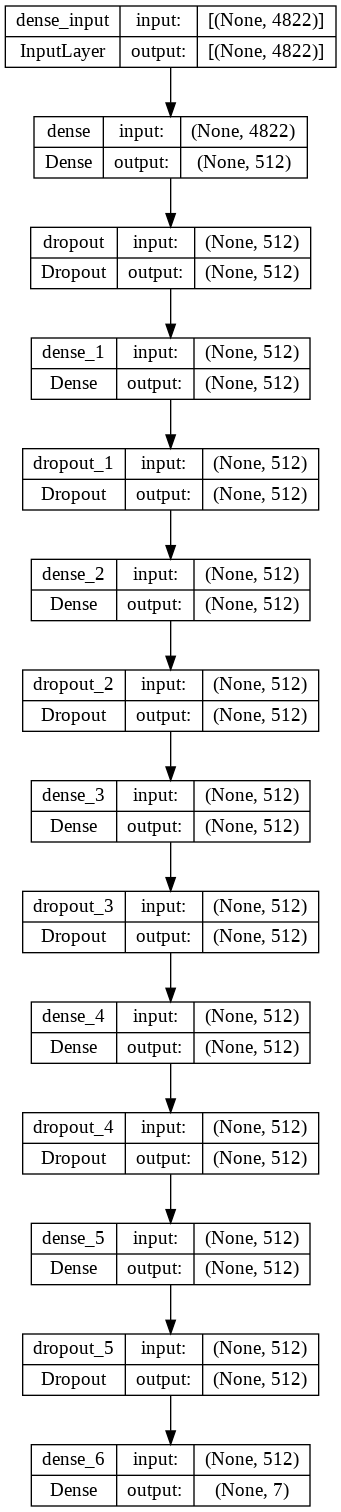

In [ ]:
from keras.utils.vis_utils import plot_model
#model_dnn.summary()
plot_model(model_dnn, show_shapes=True, show_layer_names=True)

In [41]:
history = model_dnn.fit(X_train_tfidf, Y_train_cat,
              validation_data=(X_val_tfidf, Y_val_cat),
              epochs=10,
              batch_size=128,
              verbose=2,
              callbacks=callbacks,
              shuffle  = True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.34090, saving model to /content/drive/MyDrive/Capstone Project/Models/dnn.hdf5
318/318 - 28s - loss: 1.5818 - accuracy: 0.3870 - val_loss: 1.3409 - val_accuracy: 0.5115 - lr: 0.0010 - 28s/epoch - 88ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.34090 to 1.05370, saving model to /content/drive/MyDrive/Capstone Project/Models/dnn.hdf5
318/318 - 44s - loss: 1.1005 - accuracy: 0.5898 - val_loss: 1.0537 - val_accuracy: 0.6101 - lr: 0.0010 - 44s/epoch - 138ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.05370 to 0.98155, saving model to /content/drive/MyDrive/Capstone Project/Models/dnn.hdf5
318/318 - 27s - loss: 0.8836 - accuracy: 0.6521 - val_loss: 0.9816 - val_accuracy: 0.6345 - lr: 0.0010 - 27s/epoch - 86ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.98155 to 0.93466, saving model to /content/drive/MyDrive/Capstone Project/Models/dnn.hdf5
318/318 - 27s - loss: 0.7683 - accuracy: 0.6937 - val_loss: 0.9347 - val_accur

In [77]:
predict = model_dnn.predict(X_val_tfidf)
pred_dnn_int = np.argmax(predict,axis=1)

544/544 [==============================] - 7s 12ms/step


In [78]:
pred_dnn = le.inverse_transform(pred_dnn_int)
Y_val_inv = le.inverse_transform(Y_val_le)

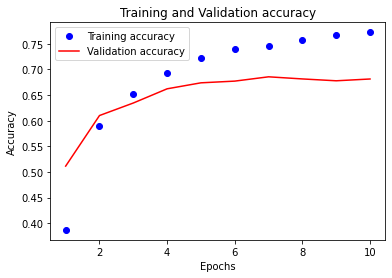

In [43]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

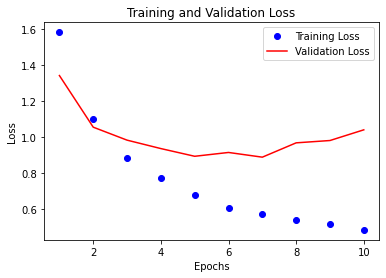

In [44]:
acc = history.history["loss"]
val_acc = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Loss")
plt.plot(epochs, val_acc, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras import utils 

# load the model from disk
filename = '/content/drive/MyDrive/Capstone Project/Models/dnn.hdf5'
dnn = load_model(filename)

In [79]:
df = pd.DataFrame()
df['X'] = X_val_sub['Clean_Text']
df['Y'] = pred_dnn

In [84]:
df[df['Y'] == 'None'][60:120]

,X,Y
45893,"The idea about all of these ""moderate"" Muslims...",None
44543,Is this your way of saying that you approve of...,None
40215,I'm not sexist but I'm starting to think women...,None
41155,----rwx--- 1 samba ucit 0 Sep 1 00:15 test,None
34027,Kat is one nasty bitch,None
24680,`AWT comment! Meow! Ever thought about ``Sovie...,None
14116,Sannse is a big fat bitch for not leaving the ...,None
50391,battle lan,None
39455,: I'm not sexist but I hate when certain girls...,None
17340,== liar == that was all true you and your twis...,None


In [ ]:
print(f'Accuracy : {accuracy_score(Y_val_inv, pred_dnn)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val_inv, pred_dnn)}')

Accuracy : 0.6813009998850706


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.47      0.31      0.37      3000
  Misconduct       0.57      0.62      0.59      1203
    Negative       0.75      0.91      0.82      3000
        None       0.80      0.76      0.78      3000
      Racism       0.94      0.94      0.94      1199
      Sexism       0.86      0.90      0.88      3000
       Toxic       0.41      0.44      0.42      3000

    accuracy                           0.68     17402
   macro avg       0.69      0.70      0.69     17402
weighted avg       0.67      0.68      0.67     17402



# **fastText**

In [16]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3164317 sha256=bf7aceaabec8d103e67839eab2cff5bdf02f3fb7644e88c5d120636d1fd63ccb
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [17]:
import fasttext
import csv

In [19]:
Y = train.Bully
X = train.drop(['Bully'], axis = 1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = train['Bully'])
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(704949, 4) (302122, 4) (704949,) (302122,)


In [20]:
# Prefixing each row of the category column with '__label__'
Y_train_ft = Y_train.apply(lambda x: '__label__' + x)
Y_val_ft = Y_val.apply(lambda x: '__label__' + x)

In [ ]:
# Saving the CSV file as a text file to train/test the classifier
pd.DataFrame(zip(X_train['Preprocessed_Text'], Y_train_ft)).to_csv('/content/drive/MyDrive/Capstone Project/Data/train.txt',
                                                                index = False, 
                                                                sep = ' ',
                                                                header = None,
                                                                quoting = csv.QUOTE_NONE,
                                                                quotechar = "",
                                                                escapechar = " ")

pd.DataFrame(zip(X_val['Preprocessed_Text'], Y_val_ft)).to_csv('/content/drive/MyDrive/Capstone Project/Data/val.txt',
                                                            index = False,
                                                            sep = ' ',
                                                            header = None,
                                                            quoting = csv.QUOTE_NONE, 
                                                            quotechar = "", 
                                                            escapechar = " ")

In [ ]:
# Training the fastText classifier
model_ft = fasttext.train_supervised('/content/drive/MyDrive/Capstone Project/Data/train.txt', wordNgrams = 2)

In [ ]:
# Evaluating performance on the entire train file
train_metrics_ft = model_ft.test('/content/drive/MyDrive/Capstone Project/Data/train.txt') 
# Evaluating performance on the entire test file
val_metrics_ft = model_ft.test('/content/drive/MyDrive/Capstone Project/Data/val.txt')   

In [22]:
def predict(row):
    all = model_ft.predict(row)
    label = str(all[0][0].split('__')[-1])
    percent = round(all[1][0]*100, 2)
    return label

In [23]:
pred_train_ft = X_train['Preprocessed_Text'].apply(lambda x: predict(x))
pred_val_ft = X_val['Preprocessed_Text'].apply(lambda x: predict(x))

In [24]:
print(f'Accuracy : {accuracy_score(Y_val, pred_val_ft)}\n\n')
print('**************************************************************************')
print(f'Classification Report: \n{classification_report(Y_val, pred_val_ft)}')

Accuracy : 0.9470511912406246


**************************************************************************
Classification Report: 
              precision    recall  f1-score   support

  Aggression       0.22      0.10      0.13      4123
  Misconduct       0.60      0.28      0.38      1203
    Negative       0.95      0.93      0.94     54901
        None       0.97      0.99      0.98    231151
      Racism       0.94      0.87      0.90      1198
      Sexism       0.89      0.78      0.83      3692
       Toxic       0.42      0.43      0.43      5854

    accuracy                           0.95    302122
   macro avg       0.71      0.63      0.66    302122
weighted avg       0.94      0.95      0.94    302122



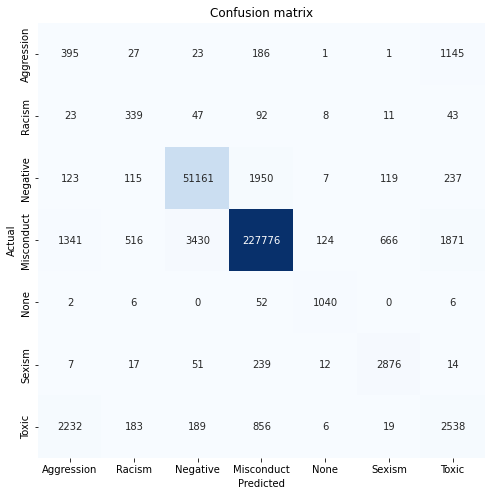

In [25]:
cm = confusion_matrix(pred_val_ft, Y_val)

classnames = list(set(Y_val))
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###### If you use single-label multi-class classification, then in fastText accuracy=recall=precision

In [ ]:
metrics_ft = [[train_metrics_ft[0], train_metrics_ft[1], train_metrics_ft[2], accuracy_score(Y_train, pred_train_ft)],
              [val_metrics_ft[0], val_metrics_ft[1], val_metrics_ft[2], accuracy_score(Y_val, pred_val_ft)]]

ft_comp = pd.DataFrame(metrics_ft, index = ['Train', 'Vaidation'], columns = ['Number of Samples', 'Precision', 'Recall', 'Accuracy'])
ft_comp

,Number of Samples,Precision,Recall,Accuracy
Train,704949,0.978122,0.978122,0.978122
Vaidation,302122,0.947051,0.947051,0.947051


# **Saving Model**

In [ ]:
# Save the trained model
model_ft.save_model('/content/drive/MyDrive/Capstone Project/Models/fasttext.bin')

In [18]:
model_ft = fasttext.load_model('/content/drive/MyDrive/Capstone Project/Models/fasttext.bin')

# **GRADIO**

In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 19.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 106 kB 60.1 MB/s 
     |████████████████████████████████| 2.3 MB 50.4 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 272 kB 75.0 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 213 kB 59.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 63 kB 783 kB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 68 kB 4.5 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 4.1 MB 63.0 MB/s 
     |████████████████████████████████| 856 kB 4

In [2]:
import gradio as gr

In [59]:
import numpy as np
import pandas as pd


from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk.stem
from nltk.stem import LancasterStemmer, SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer


def transformed_data(text): 
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
        tok = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\)]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tok)
        tok = re.sub("(@[A-Za-z0-9_]+)","", tok)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        if len(tok) > 3 and tok not in punctuation and tok.lower() not in stop_words:
          tok = stemmer.stem(WordNetLemmatizer().lemmatize(tok, pos))
          cleaned_tokens.append(tok.lower())
          
    return cleaned_tokens

In [79]:
def predict(row):
    all = model_ft.predict(transformed_data(row))
    label = str(all[0][0][0].split('__')[-1])
    percent = round(all[1][0][0]*100, 2)
    return f"{label} : {percent}%"

demo = gr.Interface(
    fn=predict, 
    inputs=gr.Textbox(placeholder="Enter your message here..."), 
    outputs="text", 
    interpretation="default")

demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://11a9eeb70af8fd30.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fcedb10d410>,
 'http://127.0.0.1:7862/',
 'https://11a9eeb70af8fd30.gradio.app')

# **TRIAL**

### **Final Prediction**

In [ ]:
# Predicting on a single input
#model_ft.predict('/content/drive/MyDrive/Capstone Project/Data/test.txt')

(('__label__None',), array([0.7401225]))

In [53]:
def predict(row):
    all = model_ft.predict(row)
    label = str(all[0][0].split('__')[-1])
    percent = round(all[1][0]*100, 2)
    return (label, percent)

In [58]:
results = train['Preprocessed_Text'].apply(lambda x: predict(x))

In [55]:
bully = []
percent = []
for i in results:
  bully.append(i[0])
  percent.append(i[1])

In [56]:
test['Bully'] = bully

In [51]:
test[test['Bully'] == 'Sexism']

,OG_Text,Bully,Clean_Text,Preprocessed_Text,Sentiment


In [ ]:
train.columns, test.columns

(Index(['OG_Text', 'Bully', 'Clean_Text', 'Preprocessed_Text', 'Sentiment'], dtype='object'),
 Index(['OG_Text', 'Bully', 'Clean_Text', 'Preprocessed_Text', 'Sentiment'], dtype='object'))

In [ ]:
full_data = pd.concat([train, test])
len(full_data)

1007071

In [ ]:
full_data.to_csv('/content/drive/MyDrive/Capstone Project/Data/FT_Annotated.csv', index = False)

In [57]:
test['Bully'].value_counts()

Series([], Name: Bully, dtype: int64)

### Apart from overcoming the challenge of handling large datasets, ensemble modeling helps overcome several other issues such as large variance and generalization error, by improving the overall accuracy of the model.

### **LIME**

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
attrib_data = X_train[:200]
explainer = shap.DeepExplainer(model_ft, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(X_test[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
  word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)